# Decision Tree

Imagine you have a toy that helps you decide whether you should wear a jacket or not. This toy asks you questions like, "Is it raining?" or "Is it cold outside?" Based on your answers, it tells you if you need a jacket or not.

Now, think of a decision tree as a game where the toy asks you one question at a time. If you answer "yes," it goes one way; if you answer "no," it goes another way. Each question helps you get closer to the final decision, like "Wear a jacket" or "Don’t wear a jacket."

In logistic regression, it's a little different. It doesn't ask you simple "yes" or "no" questions. Instead, it looks at all the things that could affect your decision, like the weather, temperature, or time of day. It uses those things to guess if something will happen (like wearing a jacket) or not.

When you combine decision trees with logistic regression, it’s like having a super-smart toy that asks the best questions to help you make the best guess. It’s not just a simple "yes" or "no," but a smart guess based on many different things!

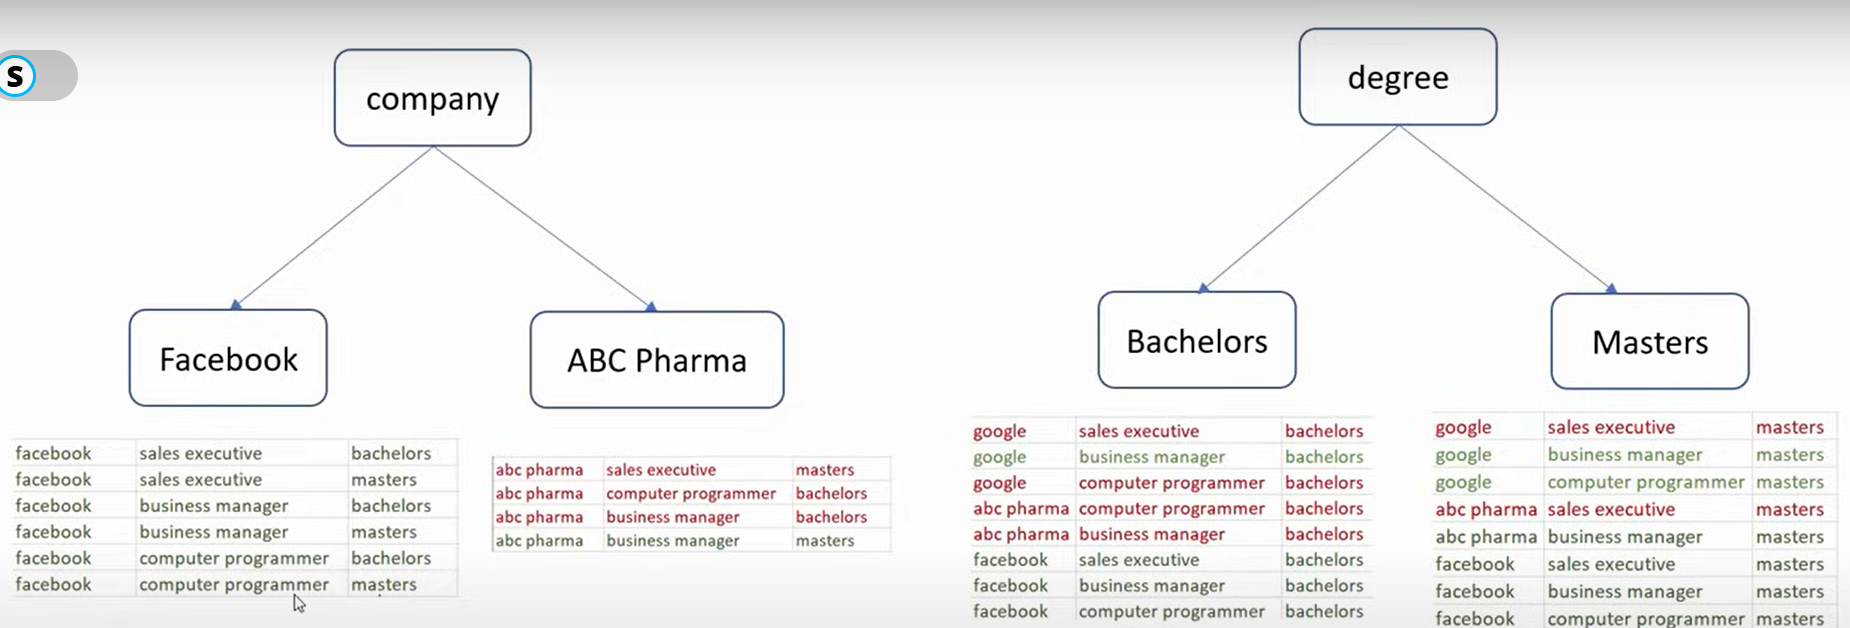

In [1]:
import pandas as pd

df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']

In [3]:
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [4]:
from sklearn.preprocessing import LabelEncoder

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()



In [5]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [6]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


# Entropy

Imagine you have a box of candies. Some candies are chocolate, and some are fruity. If the box has an equal number of chocolates and fruity candies, it's hard to guess what you'll get if you randomly pick one. This is called high entropy because there's a lot of uncertainty.

Now, if the box has only chocolates or only fruity candies, it's very easy to guess what you'll get. This is called low entropy because there's very little uncertainty.

In simple terms:
High entropy = More mixed = Harder to predict = More disorder.
Low entropy = Less mixed = Easier to predict = Less disorder.
In decision trees, entropy measures how "mixed" the data is at a certain point. The goal is to split the data so that each group has lower entropy, making it easier to decide which class something belongs to.

## We also have another method for this similar to entropy which is gini

Imagine you’re sorting candies into boxes. If each box has candies of just one type (all chocolate or all fruity), it’s very organized, and you're happy because it's easy to tell what’s in each box. But if a box has a mix of candies, it’s less organized.

Gini is a way to measure how "mixed up" the candies (or data) are in a box.

Gini in simple terms:
If all candies are the same type in a box (perfectly pure): Gini is 0. (Best case: no confusion.)
If candies are perfectly mixed (50% chocolate, 50% fruity): Gini is at its highest (0.5 in this case). (Worst case: maximum confusion.)
In decision trees, we want to split the data so that each group (box) becomes as pure as possible, reducing the Gini score. The lower the Gini, the better the split!









In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [8]:
model.score(inputs_n,target)

1.0

Here the score is one beacuse we used the same dataset for testing and training and we skipped the train_test_spilit part you can do it, well but in real life the score is less than one


In [12]:
model.predict([[2,0,1]]) # Company: Google, Job: business manager, Degree: masters

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)